In [1]:
import math
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pylab as plt
from sklearn import model_selection
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import multiprocessing as mp
import time

c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [9]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

NUM_FEATURES = 21
NUM_CLASSES = 3

learning_rate = 0.01
epochs = 1000
beta = 1e-6
num_neurons = 10
seed = 20
np.random.seed(seed)

batch size: 4
Fold number: 1
iter 0: Train accuracy 0.794118
iter 0: Test accuracy 0.785235
iter 0: Time 1.57103e+09
iter 100: Train accuracy 0.886555
iter 100: Test accuracy 0.895973
iter 100: Time 1.57103e+09
iter 200: Train accuracy 0.898319
iter 200: Test accuracy 0.899329
iter 200: Time 1.57103e+09
iter 300: Train accuracy 0.90084
iter 300: Test accuracy 0.892617
iter 300: Time 1.57103e+09
iter 400: Train accuracy 0.905882
iter 400: Test accuracy 0.889262
iter 400: Time 1.57103e+09
iter 500: Train accuracy 0.906723
iter 500: Test accuracy 0.885906
iter 500: Time 1.57103e+09
iter 600: Train accuracy 0.904202
iter 600: Test accuracy 0.889262
iter 600: Time 1.57103e+09
iter 700: Train accuracy 0.906723
iter 700: Test accuracy 0.889262
iter 700: Time 1.57103e+09
iter 800: Train accuracy 0.906723
iter 800: Test accuracy 0.885906
iter 800: Time 1.57103e+09
iter 900: Train accuracy 0.906723
iter 900: Test accuracy 0.88255
iter 900: Time 1.57103e+09
Fold number: 2
iter 0: Train accuracy 0

iter 700: Train accuracy 0.900084
iter 700: Test accuracy 0.878788
iter 700: Time 1.57103e+09
iter 800: Train accuracy 0.901763
iter 800: Test accuracy 0.878788
iter 800: Time 1.57103e+09
iter 900: Train accuracy 0.902603
iter 900: Test accuracy 0.882155
iter 900: Time 1.57103e+09
Fold number: 5
iter 0: Train accuracy 0.800168
iter 0: Test accuracy 0.760943
iter 0: Time 1.57103e+09
iter 100: Train accuracy 0.879093
iter 100: Test accuracy 0.858586
iter 100: Time 1.57103e+09
iter 200: Train accuracy 0.894207
iter 200: Test accuracy 0.878788
iter 200: Time 1.57103e+09
iter 300: Train accuracy 0.895886
iter 300: Test accuracy 0.878788
iter 300: Time 1.57103e+09
iter 400: Train accuracy 0.899244
iter 400: Test accuracy 0.885522
iter 400: Time 1.57103e+09
iter 500: Train accuracy 0.900924
iter 500: Test accuracy 0.888889
iter 500: Time 1.57103e+09
iter 600: Train accuracy 0.901763
iter 600: Test accuracy 0.888889
iter 600: Time 1.57103e+09
iter 700: Train accuracy 0.900084
iter 700: Test ac

iter 300: Train accuracy 0.862185
iter 300: Test accuracy 0.892617
iter 300: Time 1.57103e+09
iter 400: Train accuracy 0.873109
iter 400: Test accuracy 0.892617
iter 400: Time 1.57103e+09
iter 500: Train accuracy 0.877311
iter 500: Test accuracy 0.895973
iter 500: Time 1.57103e+09
iter 600: Train accuracy 0.882353
iter 600: Test accuracy 0.892617
iter 600: Time 1.57103e+09
iter 700: Train accuracy 0.884874
iter 700: Test accuracy 0.899329
iter 700: Time 1.57103e+09
iter 800: Train accuracy 0.884874
iter 800: Test accuracy 0.902685
iter 800: Time 1.57103e+09
iter 900: Train accuracy 0.888235
iter 900: Test accuracy 0.902685
iter 900: Time 1.57103e+09
Fold number: 4
iter 0: Train accuracy 0.748111
iter 0: Test accuracy 0.734007
iter 0: Time 1.57103e+09
iter 100: Train accuracy 0.815281
iter 100: Test accuracy 0.79798
iter 100: Time 1.57103e+09
iter 200: Train accuracy 0.851385
iter 200: Test accuracy 0.83165
iter 200: Time 1.57103e+09
iter 300: Train accuracy 0.867338
iter 300: Test accu

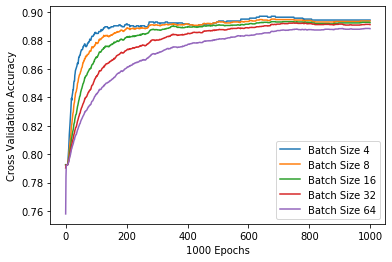

In [16]:
#read train data
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')
trainX, train_Y = train_input[1:, :21], train_input[1:,-1].astype(int)
#split dataset in 70:30
X_train, X_test, Ytrain, Ytest = train_test_split(trainX, train_Y, test_size=0.3, random_state=20, shuffle=True)

X_train = scale(X_train, np.min(X_train, axis=0), np.max(X_train, axis=0))
X_test = scale(X_test, np.min(X_test, axis=0), np.max(X_test, axis=0))

Y_train = np.zeros((Ytrain.shape[0], NUM_CLASSES))
Y_train[np.arange(Ytrain.shape[0]), Ytrain-1] = 1 #one hot matrix

Y_test = np.zeros((Ytest.shape[0], NUM_CLASSES))
Y_test[np.arange(Ytest.shape[0]), Ytest-1] = 1 #one hot matrix

n = trainX.shape[0]
    
# Create the model
x = tf.placeholder(tf.float32, [None, NUM_FEATURES])
y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES])

# Build the graph for the deep net
        
#Build 1st layer to hidden layer
weights_to_h = tf.Variable(tf.truncated_normal([NUM_FEATURES, num_neurons], stddev=1.0/math.sqrt(float(NUM_FEATURES))), name='weights_to_h')
biases_to_h  = tf.Variable(tf.zeros([num_neurons]), name='biases_to_h')
hidden1 = tf.nn.relu(tf.matmul(x, weights_to_h) + biases_to_h)

#Build 2nd layer to output layer (softmax layer)
weights_to_o = tf.Variable(tf.truncated_normal([NUM_FEATURES, NUM_CLASSES], stddev=1.0/math.sqrt(float(NUM_FEATURES))), name='weights_to_o')
biases_to_o  = tf.Variable(tf.zeros([NUM_CLASSES]), name='biases_to_o')
logits  = tf.matmul(x, weights_to_o) + biases_to_o

#L2 regularization with weight decay
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=logits)
regularization = tf.nn.l2_loss(weights_to_h) + tf.nn.l2_loss(weights_to_o)
loss = tf.reduce_mean(cross_entropy + beta*regularization)

# Create the gradient descent optimizer with the given learning rate.
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

correct_prediction = tf.cast(tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1)), tf.float32)
accuracy = tf.reduce_mean(correct_prediction)

kf = KFold(n_splits=5, random_state=20, shuffle=True)
acc_fold = []

mean_acc_batch = []
totalmean_acc_batch = []

N=len(X_train)
idx = np.arange(N)
batch_sizes = [4, 8, 16, 32, 64]
time_update = []
m = 0

for batch in batch_sizes:
    print('batch size: %d'%batch)
    fold = 1
    time_to_update = 0
    
    for train_index, test_index in kf.split(X_train):
        #print("TRAIN:", train_index, "TEST:", test_index)
        print("Fold number: " + str(fold))
        X_traink, X_testk = X_train[train_index], X_train[test_index]
        Y_traink, Y_testk = Y_train[train_index], Y_train[test_index]
    
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            train_acc = []
            test_acc = []
    
            for i in range(epochs):

                t = time.time()
        
                for start, end in zip(range(0, N, batch), range(batch, N, batch)):
                    train_op.run(feed_dict={x: X_traink[start:end], y_: Y_traink[start:end]})
                time_to_update += time.time() - t
        
                train_acc.append(accuracy.eval(feed_dict={x: X_traink, y_: Y_traink}))
                test_acc.append(accuracy.eval(feed_dict={x: X_testk, y_: Y_testk}))
          
                if i%100 == 0:
                    print('iter %d: Train accuracy %g'%(i, train_acc[i]))
                    print('iter %d: Test accuracy %g'%(i, test_acc[i])) 
                    print('iter %d: Time %g'%(i, t))
        
        #store accuracy of each fold
        acc_fold.append(test_acc)
        fold += 1
        
    #find mean accuracy of each batch
    mean_acc = np.mean(np.array(acc_fold), axis=0)
    mean_acc_batch.append(mean_acc)
    
    time_update.append((time_to_update*1e3)/(epochs*(N//batch)))
    print('time taken: %g'%(time_update[m]))
    m = m + 1
    
    #find total mean accuracy of each batch
    totalmean_acc = np.mean(np.array(mean_acc), axis=0)
    totalmean_acc_batch.append(totalmean_acc.mean())
    
# 2a) plot CV accuracy against number of epochs for different batch size           
plt.figure(1)
plt.plot(range(epochs), mean_acc_batch[0], label = "Batch Size 4")
plt.plot(range(epochs), mean_acc_batch[1], label = "Batch Size 8")
plt.plot(range(epochs), mean_acc_batch[2], label = "Batch Size 16")
plt.plot(range(epochs), mean_acc_batch[3], label = "Batch Size 32")
plt.plot(range(epochs), mean_acc_batch[4], label = "Batch Size 64")
plt.xlabel(str(epochs) + ' Epochs')
plt.ylabel('Cross Validation Accuracy')
plt.legend()
plt.show()

Text(0.5, 1.0, 'time to update vs. batch size')

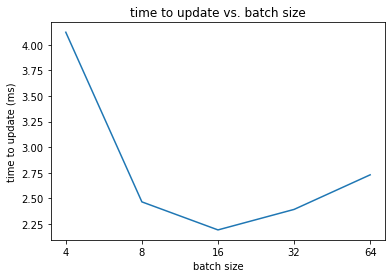

In [18]:
plt.figure(2)
plt.plot(range(len(batch_sizes)), time_update)
plt.xticks(range(len(batch_sizes)), batch_sizes)
plt.xlabel('batch size')
plt.ylabel('time to update (ms)')
plt.title('time to update vs. batch size')

In [21]:
fold = 1
time_to_update = 0
epochs = 2000
    
for train_index, test_index in kf.split(X_train):
        #print("TRAIN:", train_index, "TEST:", test_index)
    print("Fold number: " + str(fold))
    X_traink, X_testk = X_train[train_index], X_train[test_index]
    Y_traink, Y_testk = Y_train[train_index], Y_train[test_index]
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        train_acc = []
        test_acc = []
    
        for i in range(epochs):

            t = time.time()
        
            for start, end in zip(range(0, N, 16), range(16, N, 16)):
                train_op.run(feed_dict={x: X_traink[start:end], y_: Y_traink[start:end]})
            time_to_update += time.time() - t
        
            train_acc.append(accuracy.eval(feed_dict={x: X_traink, y_: Y_traink}))
            test_acc.append(accuracy.eval(feed_dict={x: X_testk, y_: Y_testk}))
          
            if i%100 == 0:
                print('iter %d: Train accuracy %g'%(i, train_acc[i]))
                print('iter %d: Test accuracy %g'%(i, test_acc[i])) 
                print('iter %d: Time %g'%(i, t))
        
    fold += 1

Fold number: 1
iter 0: Train accuracy 0.794118
iter 0: Test accuracy 0.785235
iter 0: Time 1.57104e+09
iter 100: Train accuracy 0.84958
iter 100: Test accuracy 0.832215
iter 100: Time 1.57104e+09
iter 200: Train accuracy 0.873109
iter 200: Test accuracy 0.865772
iter 200: Time 1.57104e+09
iter 300: Train accuracy 0.885714
iter 300: Test accuracy 0.895973
iter 300: Time 1.57104e+09
iter 400: Train accuracy 0.889916
iter 400: Test accuracy 0.895973
iter 400: Time 1.57104e+09
iter 500: Train accuracy 0.894118
iter 500: Test accuracy 0.899329
iter 500: Time 1.57104e+09
iter 600: Train accuracy 0.895798
iter 600: Test accuracy 0.892617
iter 600: Time 1.57104e+09
iter 700: Train accuracy 0.898319
iter 700: Test accuracy 0.892617
iter 700: Time 1.57104e+09
iter 800: Train accuracy 0.898319
iter 800: Test accuracy 0.892617
iter 800: Time 1.57104e+09
iter 900: Train accuracy 0.898319
iter 900: Test accuracy 0.892617
iter 900: Time 1.57104e+09
iter 1000: Train accuracy 0.901681
iter 1000: Test a

iter 600: Train accuracy 0.895886
iter 600: Test accuracy 0.878788
iter 600: Time 1.57104e+09
iter 700: Train accuracy 0.895046
iter 700: Test accuracy 0.882155
iter 700: Time 1.57104e+09
iter 800: Train accuracy 0.897565
iter 800: Test accuracy 0.882155
iter 800: Time 1.57104e+09
iter 900: Train accuracy 0.898405
iter 900: Test accuracy 0.882155
iter 900: Time 1.57104e+09
iter 1000: Train accuracy 0.900924
iter 1000: Test accuracy 0.885522
iter 1000: Time 1.57104e+09
iter 1100: Train accuracy 0.900924
iter 1100: Test accuracy 0.885522
iter 1100: Time 1.57104e+09
iter 1200: Train accuracy 0.901763
iter 1200: Test accuracy 0.885522
iter 1200: Time 1.57104e+09
iter 1300: Train accuracy 0.901763
iter 1300: Test accuracy 0.888889
iter 1300: Time 1.57104e+09
iter 1400: Train accuracy 0.901763
iter 1400: Test accuracy 0.888889
iter 1400: Time 1.57104e+09
iter 1500: Train accuracy 0.901763
iter 1500: Test accuracy 0.888889
iter 1500: Time 1.57104e+09
iter 1600: Train accuracy 0.901763
iter 16

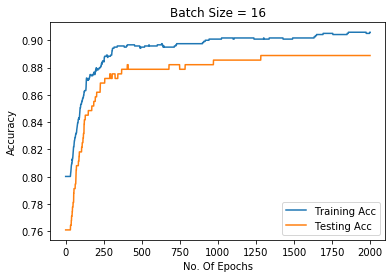

In [22]:
# plot training accuracy against no. of epochs
plt.figure(3)
plt.plot(range(epochs), train_acc, label = "Training Acc")
plt.plot(range(epochs), test_acc, label = "Testing Acc")
plt.xlabel('No. Of Epochs')
plt.ylabel('Accuracy')
plt.title('Batch Size = 16')
plt.legend()